In [1]:
import numpy as np
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astroquery.gaia import Gaia
from astropy.time import Time
import astropy.units as u
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:
coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree))
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
planet_location = EarthLocation(lat=45*u.deg, lon=120*u.deg, height=0*u.m)
azimuths = []
altitudes = []
for star in r:
    star_location = SkyCoord(ra=star['ra'], dec=star['dec'], unit=(u.degree, u.degree))
    star_altaz = star_location.transform_to(AltAz(obstime=Time.now(), location=planet_location))
    azimuths.append(star_altaz.az)
    altitudes.append(star_altaz.alt)
r['azimuth'] = azimuths
r['altitude'] = altitudes

INFO: Query finished. [astroquery.utils.tap.core]


In [3]:
azimuth_rad = np.radians(r['azimuth'])
altitude_rad = np.radians(r['altitude'])
r = 1
x = r * np.cos(altitude_rad) * np.sin(azimuth_rad)
y = r * np.cos(altitude_rad) * np.cos(azimuth_rad)
z = r * np.sin(altitude_rad)

/tmp/ipykernel_34764/3258126160.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x, y, z, cmap='viridis', s=5)


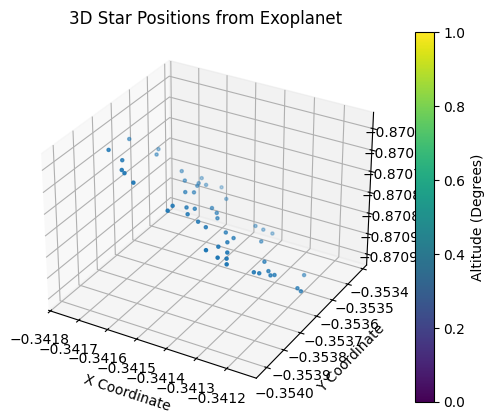

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, cmap='viridis', s=5)
cbar = plt.colorbar(scatter)
cbar.set_label('Altitude (Degrees)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('3D Star Positions from Exoplanet')
plt.show()